<a href="https://colab.research.google.com/github/malzate10/mental-Ataraxia/blob/main/solpto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn xgboost pandas numpy matplotlib seaborn kaggle requests


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
import subprocess
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/riceClassification.csv.zip')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [4]:
X = data.drop(columns=['Class', 'id'])
y = data['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

GridSearch


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# Create the function
def gbm_grid_search(learn_rate, max_depth):

    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth)

    #  make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)

    #  hyperparameters and score
    return ([learn_rate, max_depth, accuracy_score(y_test, predictions)])

In [15]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [10]:
params_grid = {'learning_rate':[0.001,0.01,0.1,0.2],
               'subsample':[0.3,0.6,0.8],
               'n_estimators':[100,150,200]}

In [11]:
model_grid = XGBClassifier()

In [13]:
grid_model = GridSearchCV(estimator=model_grid,param_grid=params_grid,cv=4,scoring='accuracy',verbose=1)

In [16]:
grid_model.fit(X_train_sc,y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.3, 0.6, 0.8]},
             scoring='accuracy', verbose=1)

 RandomSearch


In [19]:
from itertools import product
from pprint import pprint

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a randomsearch
random_combinations_index = np.random.choice(range(0, len(combinations_list)),
                                             30, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
pprint(combinations_random_chosen)

[[0.5715577889447236, 40],
 [0.2720603015075377, 19],
 [1.4925125628140703, 33],
 [0.7287939698492463, 38],
 [0.668894472361809, 35],
 [0.06241206030150754, 13],
 [0.17472361809045225, 35],
 [0.4292964824120603, 16],
 [1.3876884422110551, 21],
 [1.050753768844221, 15],
 [0.1822110552763819, 24],
 [0.039949748743718594, 29],
 [0.15226130653266332, 12],
 [0.7737185929648241, 12],
 [0.40683417085427137, 27],
 [0.5640703517587939, 22],
 [1.4475879396984925, 30],
 [0.8036683417085427, 33],
 [0.7437688442211056, 17],
 [1.095678391959799, 33],
 [0.039949748743718594, 16],
 [0.04743718592964824, 25],
 [1.3128140703517588, 40],
 [1.3951758793969848, 14],
 [1.2154773869346733, 34],
 [0.19718592964824122, 24],
 [1.1630653266331659, 22],
 [1.1705527638190953, 31],
 [0.01, 25],
 [0.5565829145728644, 13]]


In [17]:
import matplotlib.pyplot as plt

def sample_and_visualize_hyperparameters(n_samples):
    # If asking for all combinations, just return the entire list.
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
    else:
        combinations_random_chosen = []
        random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
        combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

    # Pull out the X and Y to plot
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

    # Plot
    plt.clf()
    plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    plt.gca().set_xlim([0.01, 1.5])
    plt.gca().set_ylim([10, 29])

4000


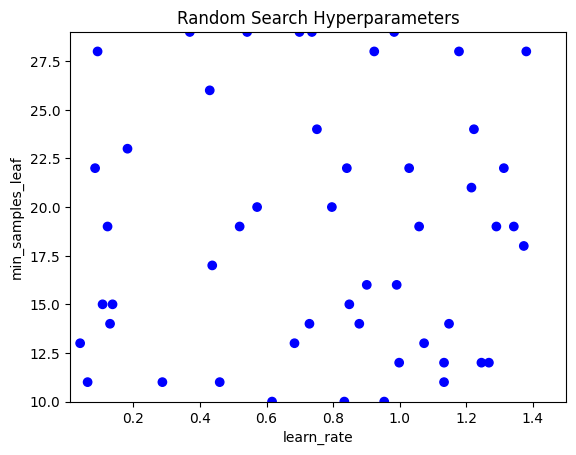

In [20]:
# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 30))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualize specified combinations
sample_and_visualize_hyperparameters(50)